# Departamento de marketing

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   #Padronizar os dados, em uma mesma escala por exemplo
from sklearn.cluster import KMeans  #Segmentação de mercado/Agrupamento dos clientes
from sklearn.decomposition import PCA   #Reduzir as dimensões entre os dados

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [10]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualização e exploração dos dados

### Pré Processamento

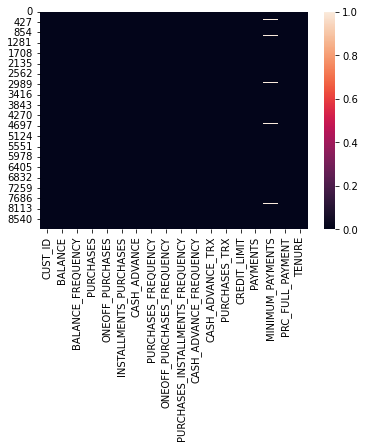

In [12]:
#Confirmando a existencia ou não de registros nulos
sns.heatmap(creditcard_df.isnull());

In [13]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Como foram identificados alguns valores nulos na coluna MINIMUN_PAYMENTS, para tratar esses registros de maneira à não excluí-los, vamos utilizar a <b>média dos valores</b> dessa coluna para substituir os valores nulos!

In [14]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [15]:
#Identificando os registros nulos e os substituindo pela média como decidido
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

Também foi identificado um valor nulo na coluna CREDIT_LIMIT, que será substituído também pela <b>média</b>, igualmente à coluna MINIMUM_PAYMENTS

In [16]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [17]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [18]:
#Conferindo se todos valores foram preenchidos, e consequentemente todos valores nulos eliminados
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

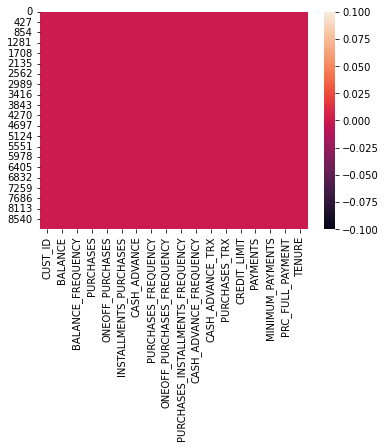

In [19]:
sns.heatmap(creditcard_df.isnull());

In [20]:
#Verificando a existência de valores duplicados
creditcard_df.duplicated().sum()

0

In [21]:
#O identificador será irrelevante para análise, então a coluna pode ser excluída
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [22]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Entendimento

In [23]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [24]:
len(creditcard_df.columns)

17

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

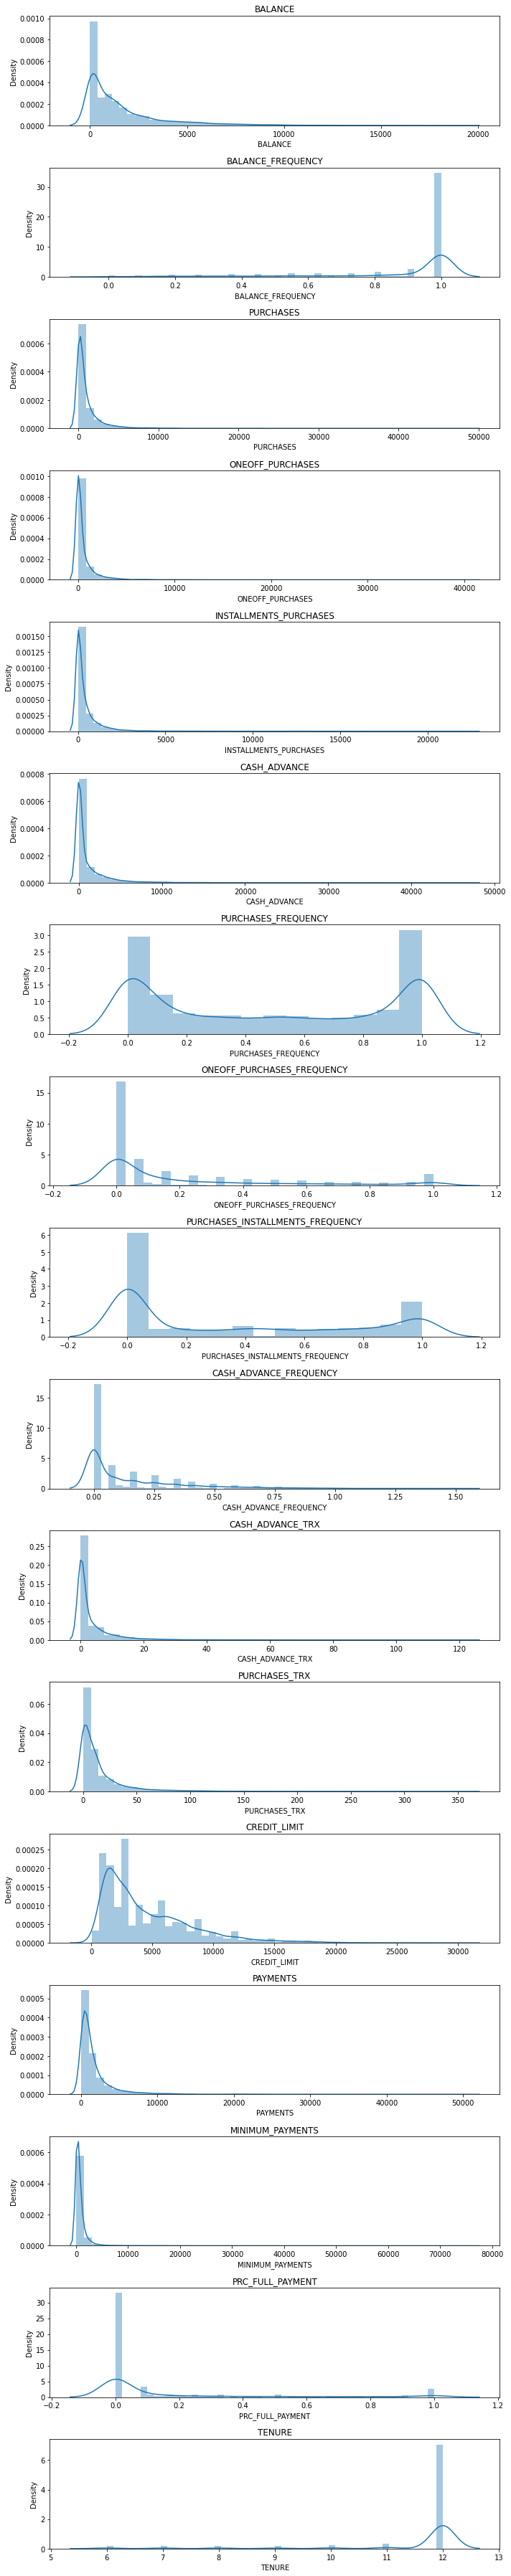

In [29]:
#Gerando um histograma para cada coluna do DF
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True);
  plt.title(creditcard_df.columns[i]);
plt.tight_layout();

In [33]:
#Matriz de correlação
correlacoes = creditcard_df.corr()

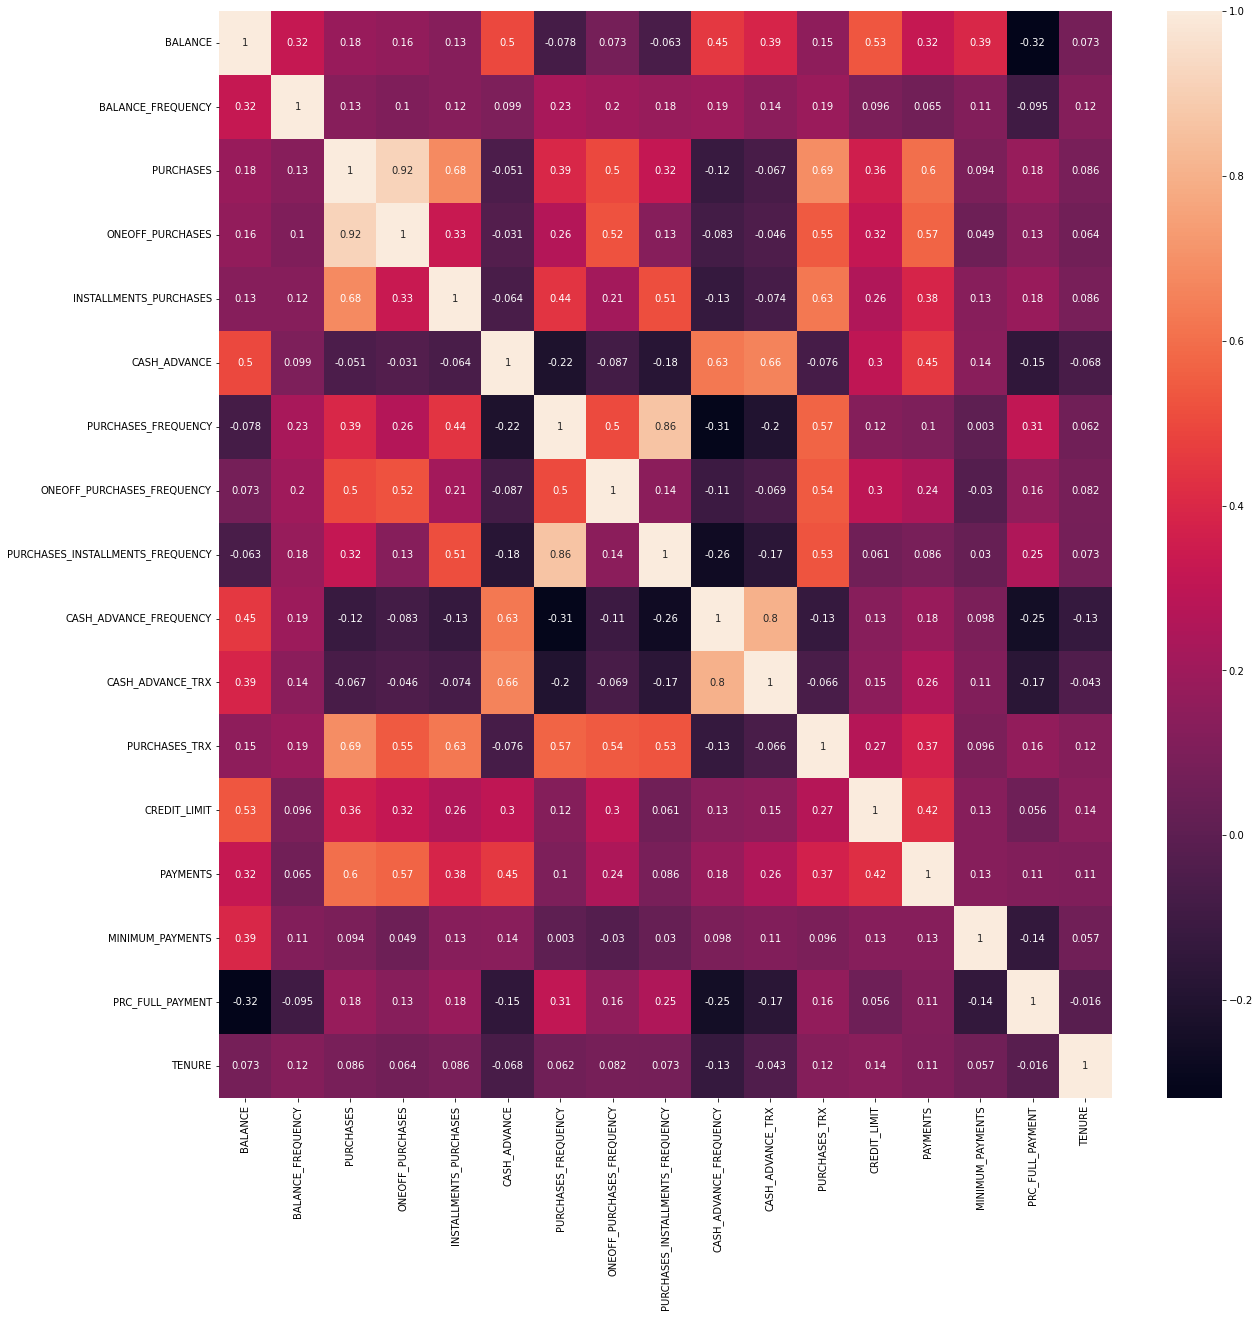

In [34]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlacoes, annot=True);

## Definição do número de clusters usando o Elbow Method (Método do Cotovelo)

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [36]:
#Vizualizando valores minínimo e máximo
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

Como os dados estão em escalas sbem diferentes, é preciso que haja uma "padronização" de escalas para melhor atuação do algoritmo

In [37]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [38]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [39]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [40]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [41]:
#Utilizaremos de 1 à 20 clusters para verificação com o Elbow Method da quantidade ideal para nossos dados
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [42]:
print(wcss_1)

[152150.00000000006, 127785.02078035082, 111986.69806610128, 99074.37425485581, 91503.39081843372, 84852.59400226278, 79880.21277363159, 75191.57794724221, 69954.72921507686, 66482.80815722748, 63656.53443894978, 61382.55043518166, 59150.03441670594, 57492.644226956516, 55910.8696647132, 54646.127682439415, 52995.07249095073, 51750.6332937137, 50604.55272027291]


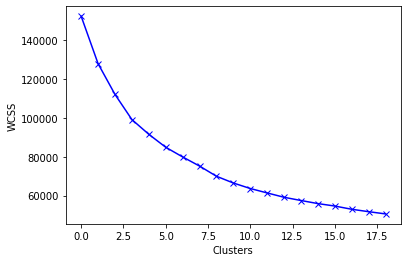

In [43]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Pode-se observar que até o cluster 8 os valores apresentam uma queda de certa forma acentuada, após isso a diferença passa a ser bem menor, quase que linear. Com isso, se ver o que o número ideal de clusters para esse banco é de 7 ou 8.

## Agrupamento com k-means

In [44]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [45]:
labels, len(labels)

(array([2, 7, 0, ..., 5, 5, 5]), 8950)

In [46]:
#Verificando a quantidade de clientes por grupo
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1107, 1179, 2721,  416, 2013,  622,   30,  862], dtype=int64))

In [47]:
#Verificando oss centróides dos clusters
kmeans.cluster_centers_

array([[-1.63211459e-01,  3.91480448e-01,  4.73928018e-01,
         6.18805310e-01, -1.64059960e-02, -3.33927641e-01,
         9.43602257e-01,  1.87933723e+00,  8.96630023e-02,
        -4.08309756e-01, -3.24503760e-01,  5.31628115e-01,
         3.83324101e-01,  1.01747521e-01, -1.62483104e-01,
         4.14775881e-01,  2.62127410e-01],
       [-7.01367765e-01, -2.14507232e+00, -3.12447030e-01,
        -2.37525786e-01, -3.02284566e-01, -3.21781866e-01,
        -5.56726546e-01, -4.45738307e-01, -4.39324943e-01,
        -5.20712703e-01, -3.76017728e-01, -4.19882936e-01,
        -1.77196361e-01, -2.03413692e-01, -2.56627028e-01,
         2.80785105e-01,  1.99062494e-01],
       [ 1.88374180e-02,  4.03364921e-01, -3.61833409e-01,
        -2.47160982e-01, -4.01359508e-01, -8.88013622e-02,
        -8.66612168e-01, -4.09672119e-01, -7.58247716e-01,
         1.12755073e-01, -2.17654068e-02, -4.86620996e-01,
        -3.05154597e-01, -2.49577357e-01, -3.84746131e-03,
        -4.56981323e-01,  2.7

In [48]:
#DF para melhor visualização
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.163211,0.391480,0.473928,0.618805,-0.016406,-0.333928,0.943602,1.879337,0.089663,-0.408310,-0.324504,0.531628,0.383324,0.101748,-0.162483,0.414776,0.262127
1,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177196,-0.203414,-0.256627,0.280785,0.199062
2,0.018837,0.403365,-0.361833,-0.247161,-0.401360,-0.088801,-0.866612,-0.409672,-0.758248,0.112755,-0.021765,-0.486621,-0.305155,-0.249577,-0.003847,-0.456981,0.272284
3,0.934901,0.467049,2.252953,1.707412,2.190297,-0.192704,1.160751,1.548096,1.257221,-0.310075,-0.208712,2.800594,1.235324,1.282259,0.575854,0.273318,0.333736
4,-0.366740,0.333338,-0.038539,-0.244303,0.357516,-0.363619,0.990253,-0.387060,1.205496,-0.475146,-0.361200,0.186769,-0.261316,-0.217940,-0.045979,0.314959,0.257484
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,1.692186,0.392753,-0.217700,-0.156079,-0.228072,2.029993,-0.476906,-0.212017,-0.414378,1.928269,1.943390,-0.266394,1.032277,0.828235,0.513803,-0.390279,0.069941


In [49]:
#Processo inverso ao escalonamento, reformulando os dados antes da "padronização" para melhor visualização
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1224.763952,0.970009,2015.759350,1619.527444,396.231906,278.609251,0.869064,0.763100,0.400072,0.053437,1.034327,27.924119,5889.139361,2027.692955,485.546522,0.275029,11.868112
1,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,266.148080,0.235839,11.783715
2,1603.683323,0.972824,230.142179,182.200764,48.123222,792.650508,0.142537,0.080245,0.063090,0.157708,3.100294,2.614254,3384.172177,1010.641858,855.240196,0.020055,11.881705
3,3510.393168,0.987910,5816.674519,3426.390962,2391.725865,574.762188,0.956216,0.664285,0.864089,0.073095,1.824519,84.322115,8989.062500,5445.158665,2206.210364,0.233656,11.963942
4,801.136827,0.956236,920.865753,186.944441,734.365067,216.346127,0.887787,0.086990,0.843532,0.040063,0.783905,19.352211,3543.676206,1102.229857,757.053521,0.245835,11.861898
5,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,5086.616444,0.970310,538.085459,333.378560,204.824983,5235.860673,0.298945,0.139209,0.199753,0.521010,16.511034,8.088269,8250.295639,4130.802621,2061.603601,0.039565,11.610918


Algumas conclusões analisando os Clusters (grupos de clientes): 

- <b>Grupo 6 (VIP/Prime):</b> limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- <b>Grupo 1:</b> Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (304). 23% de pagamento da fatura completa do cartão de crédito

- <b>Grupo 7:</b> usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5086) e sacam muito dinheiro do cartão de crédito (5235), compram pouco (0.29) e usam bastante o limite do cartão para saques (0.52). Pagam muito pouco a fatura completa (0.03)

- <b>Grupo 5</b> (clientes novos): clientes mais novos (7.22) e que mantém pouco dinheiro na conta corrente (865) 

Com essas conclusões, vamos atribuir cada um dos grupos a cada um dos clientes, para que cada cliente fique "alocado" em seu grupo no meu DF

In [50]:
labels, len(labels)

(array([2, 7, 0, ..., 5, 5, 5]), 8950)

In [51]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


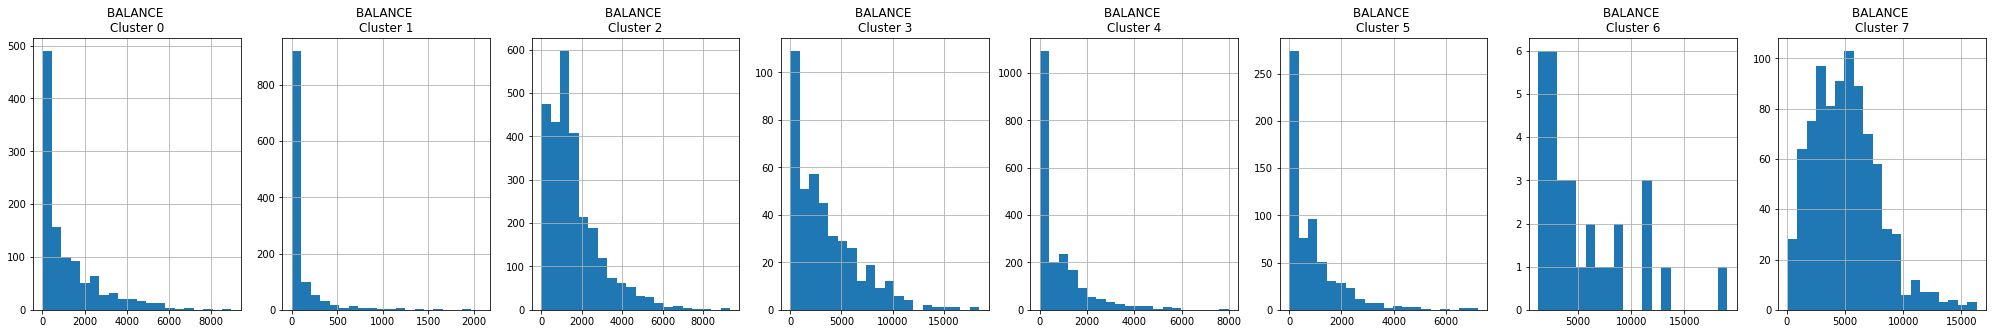

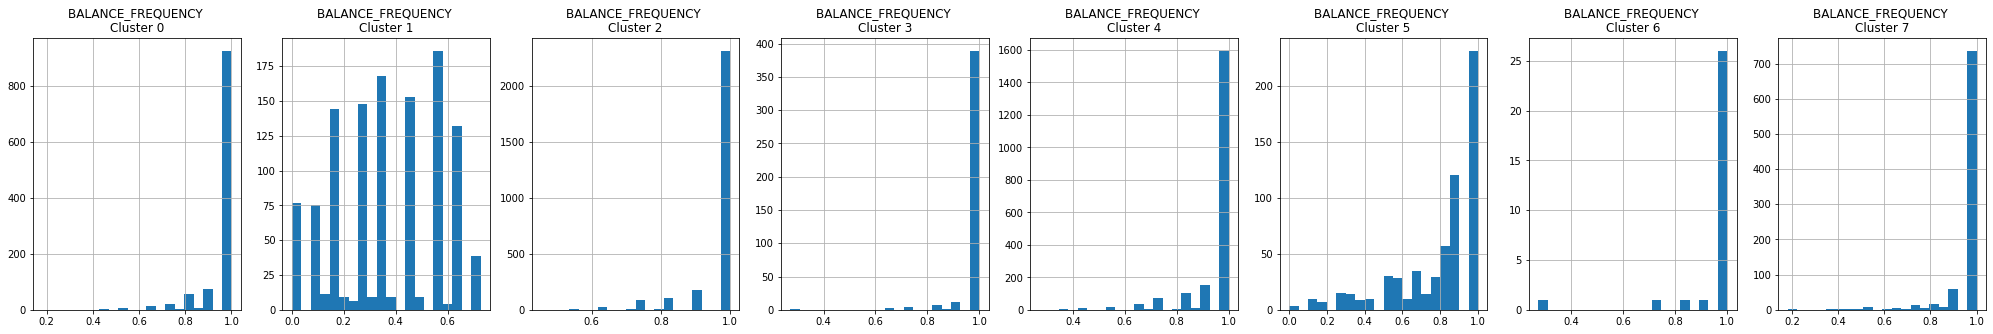

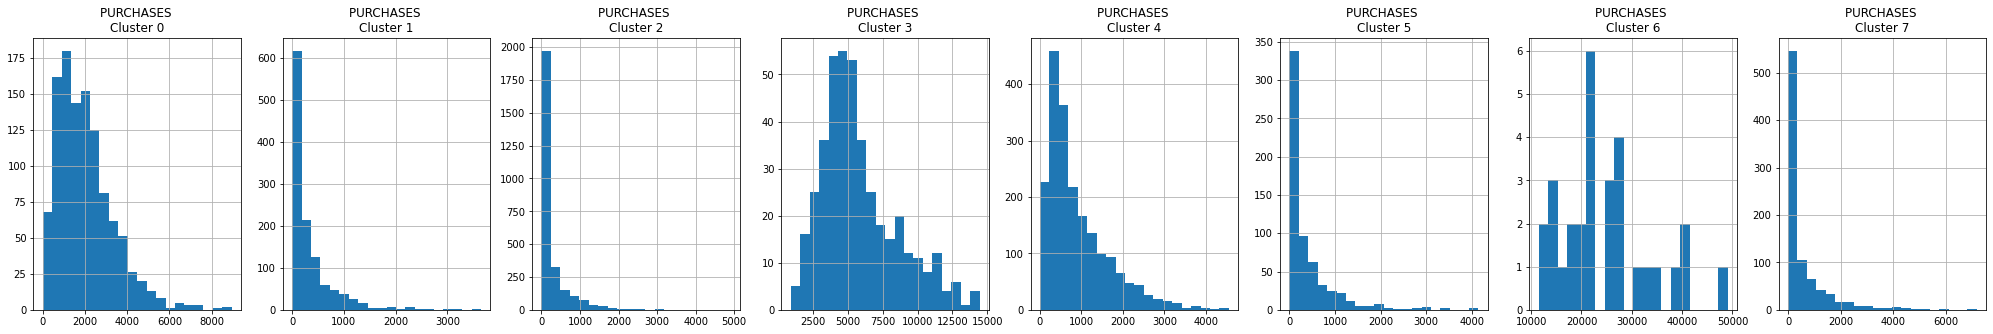

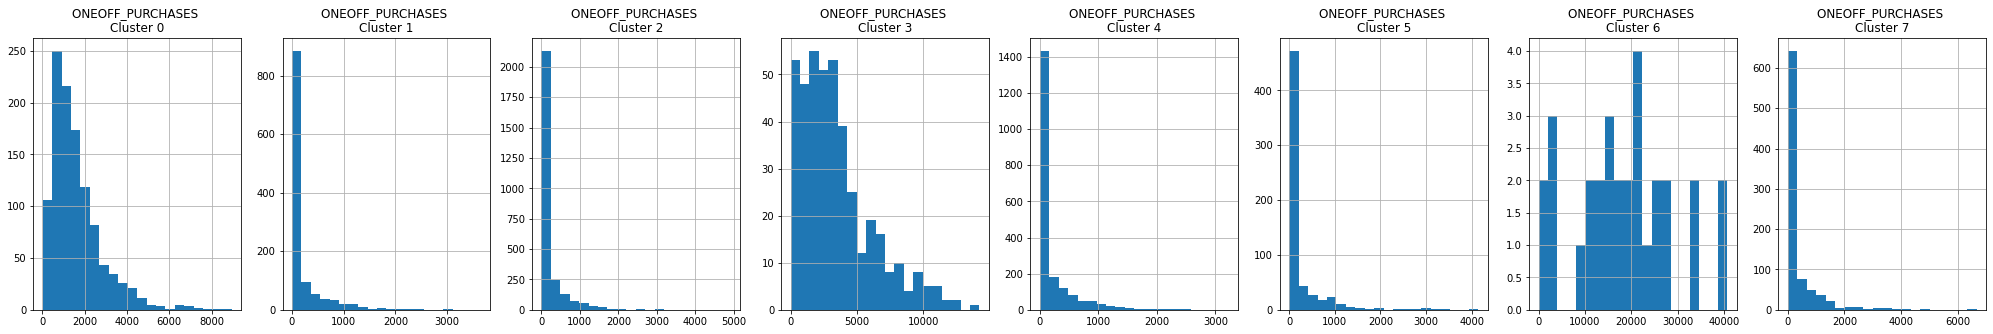

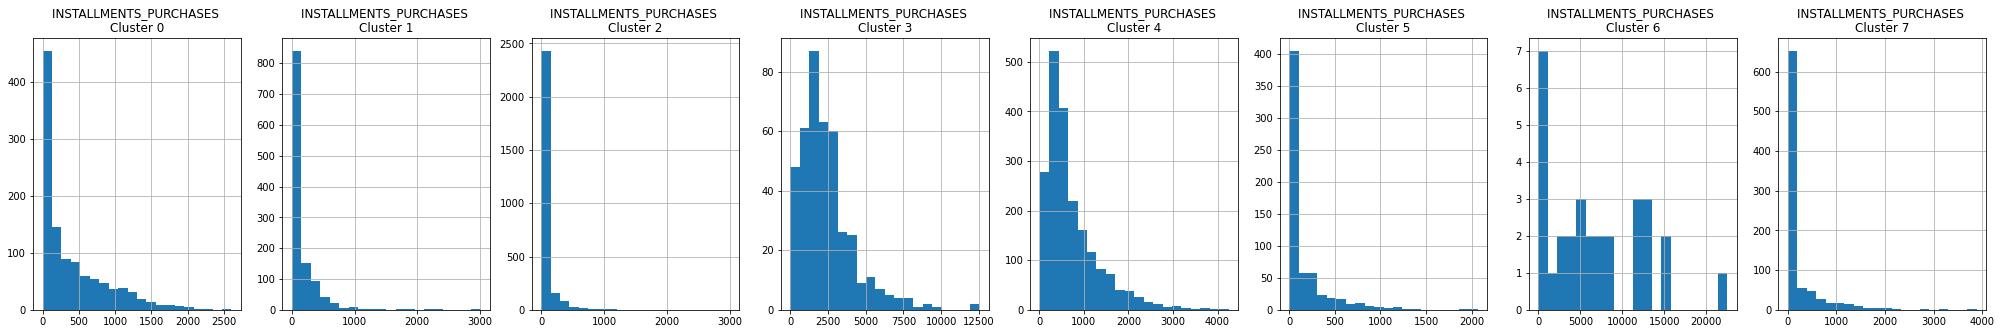

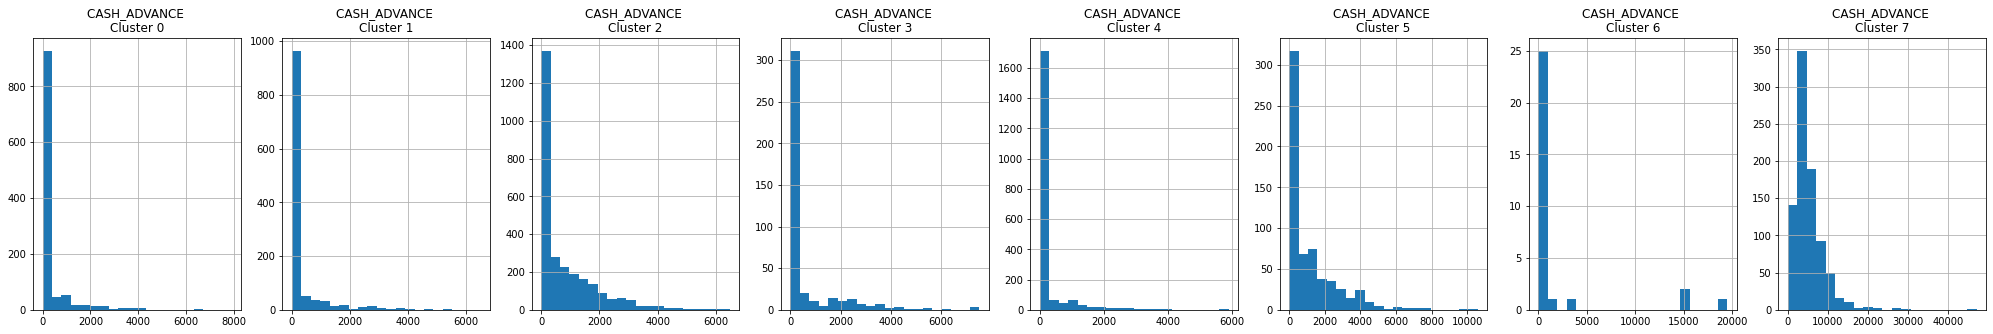

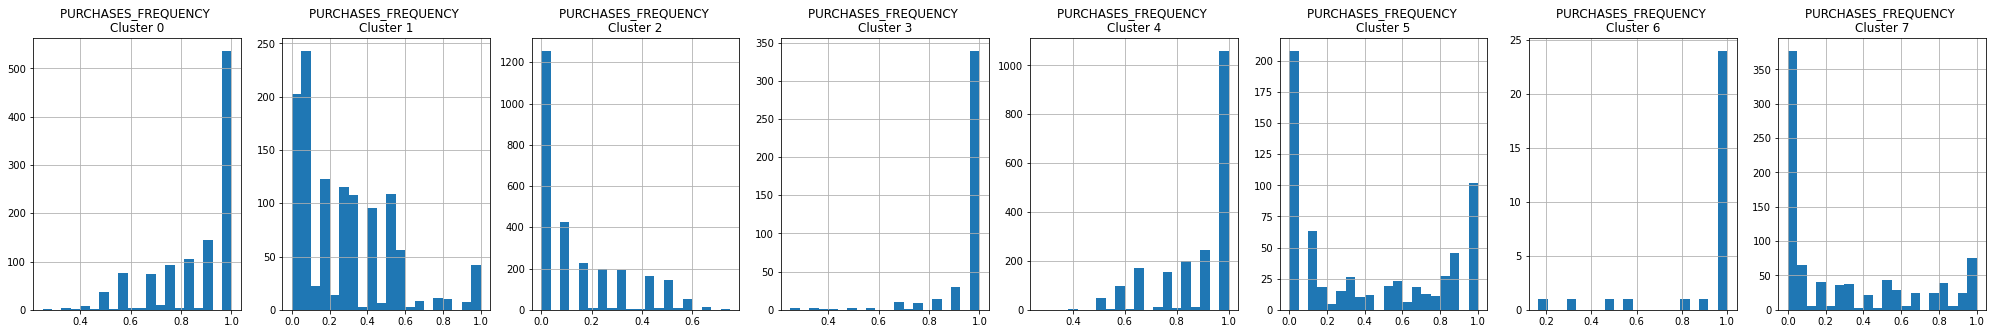

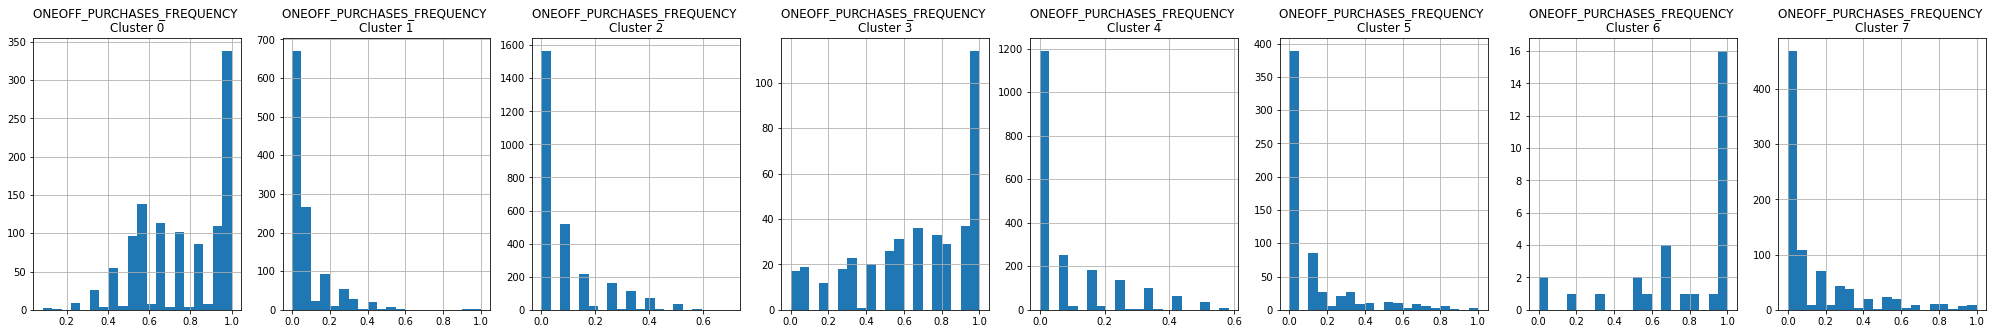

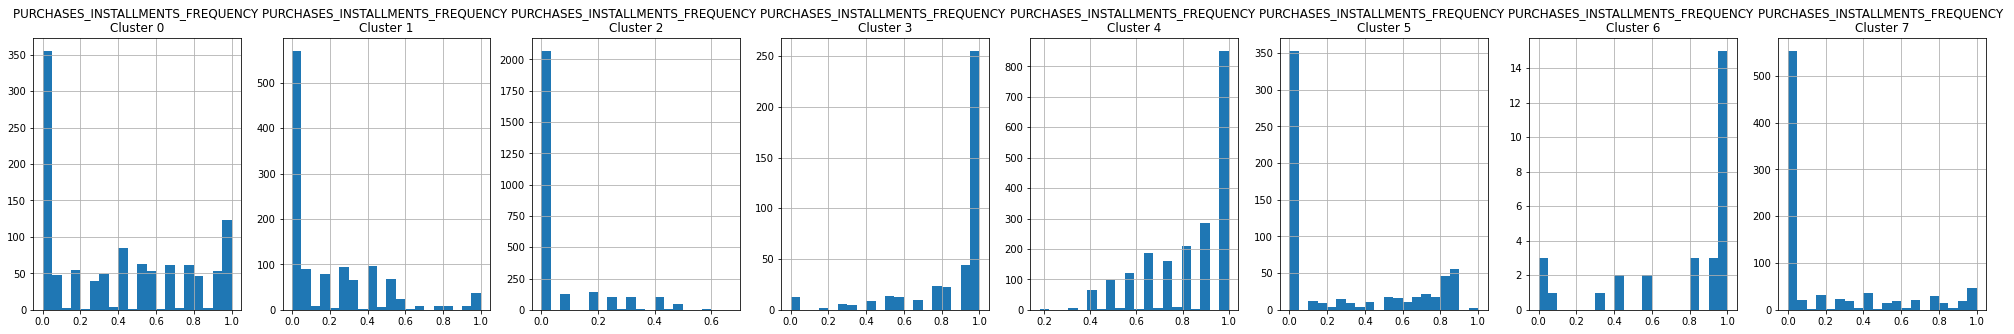

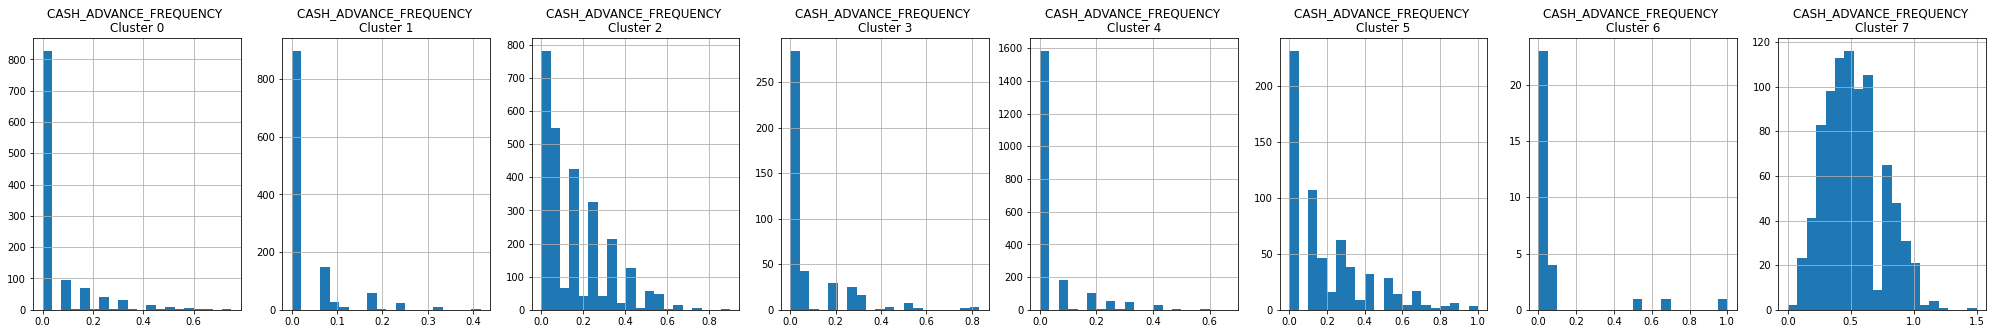

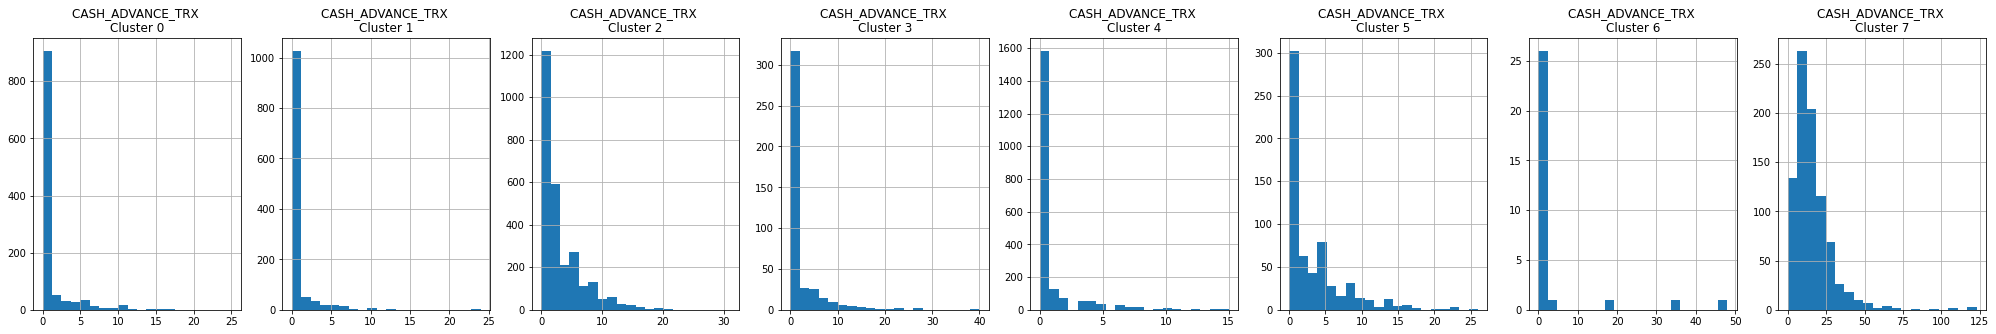

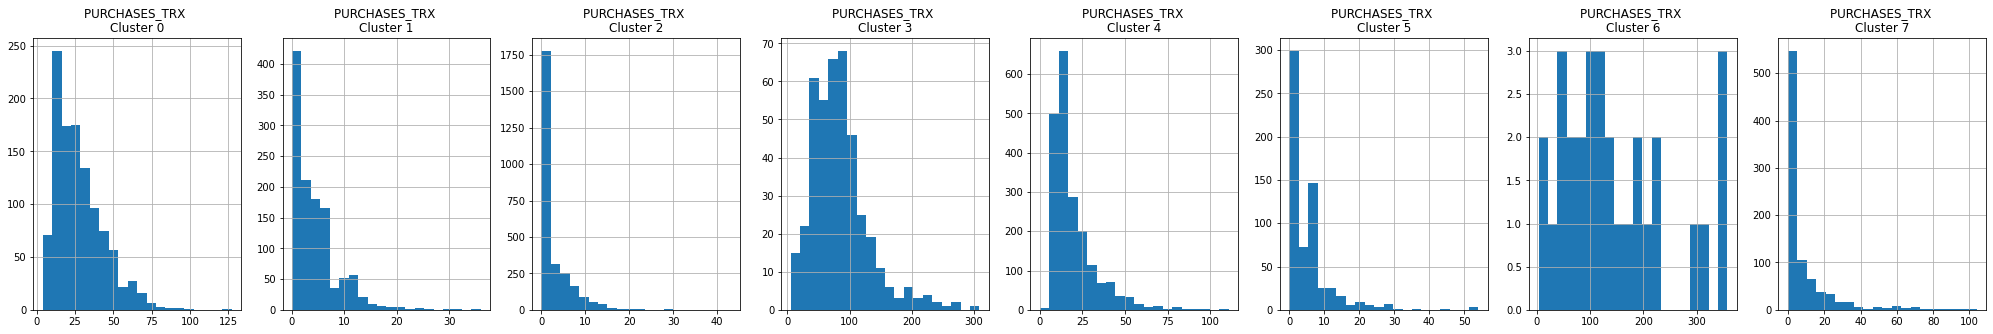

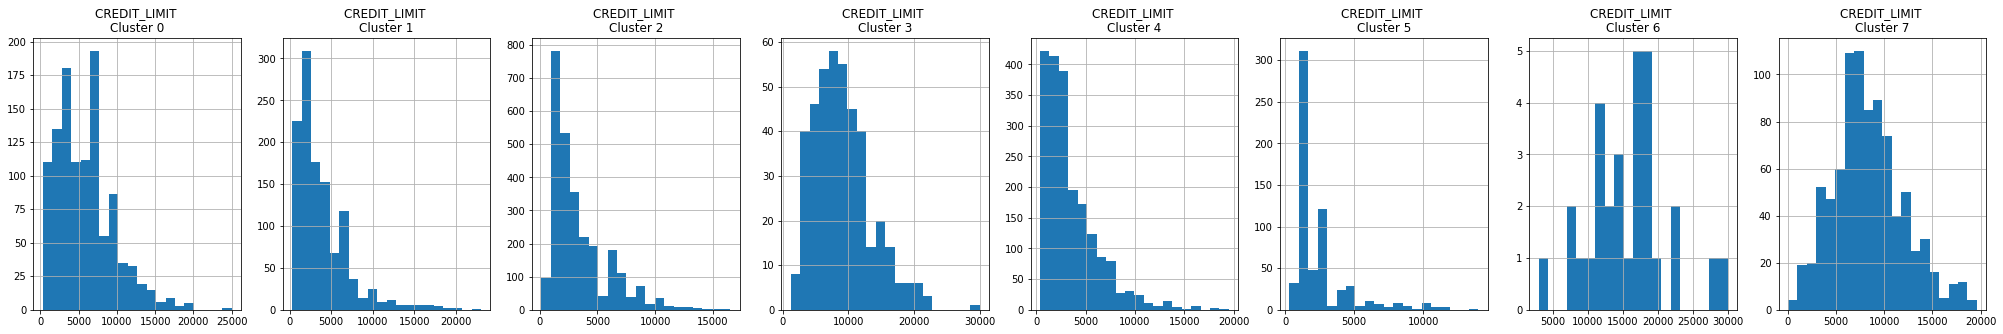

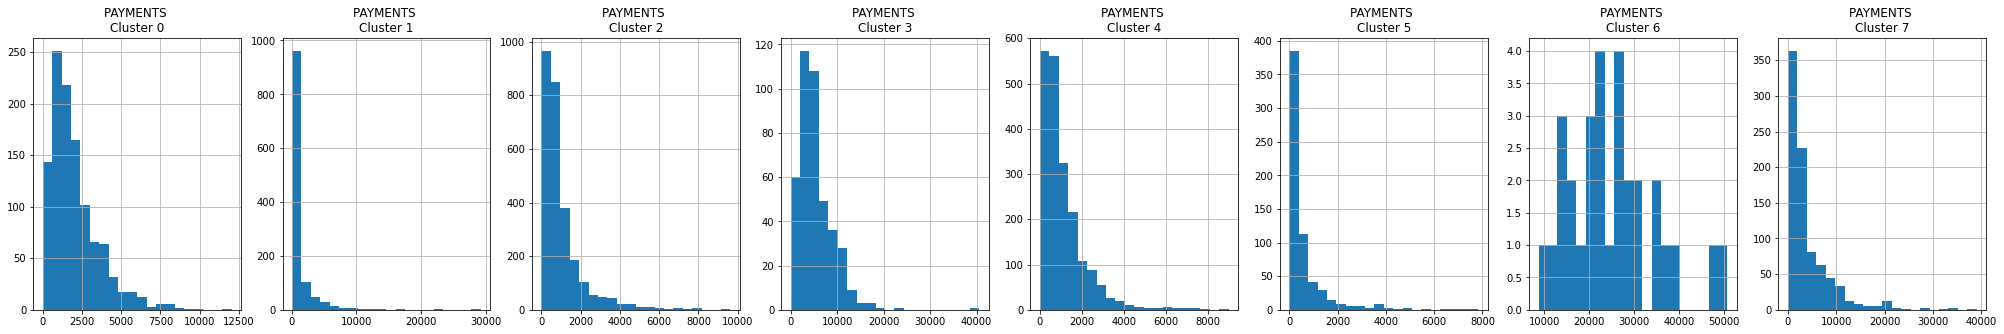

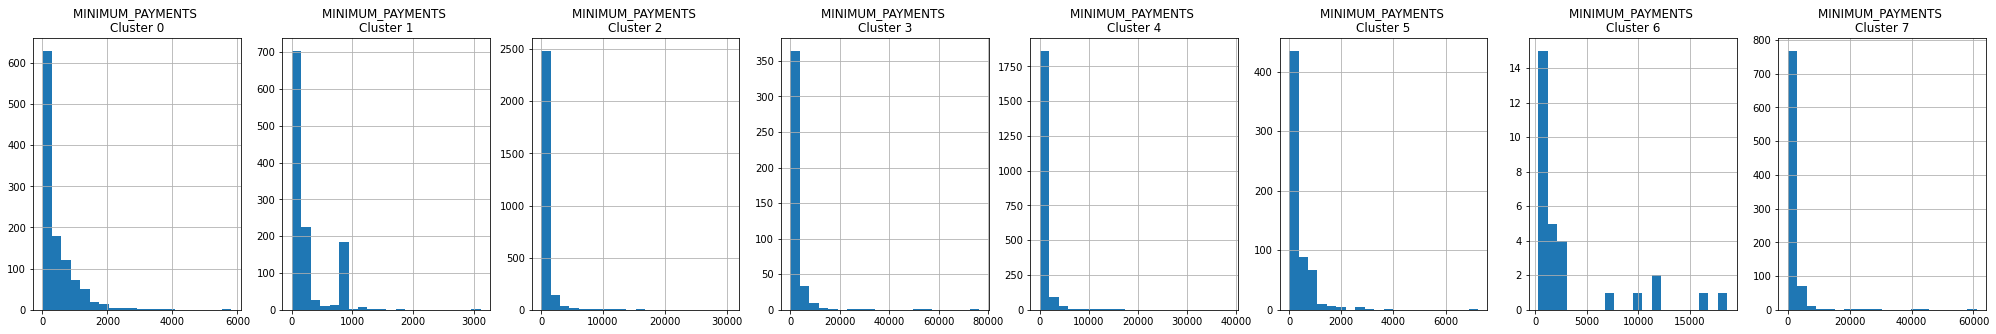

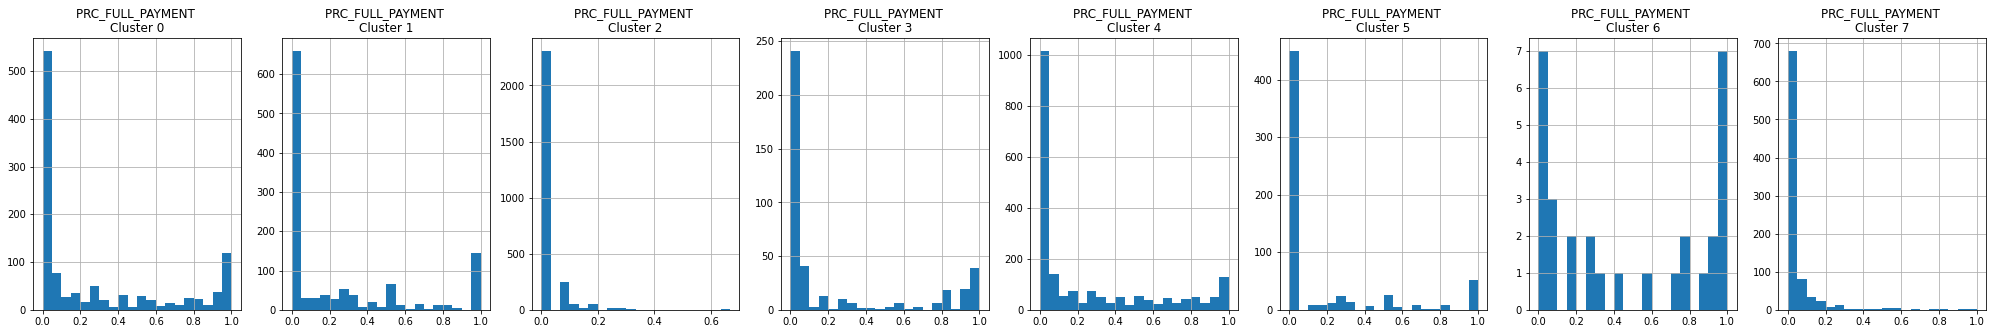

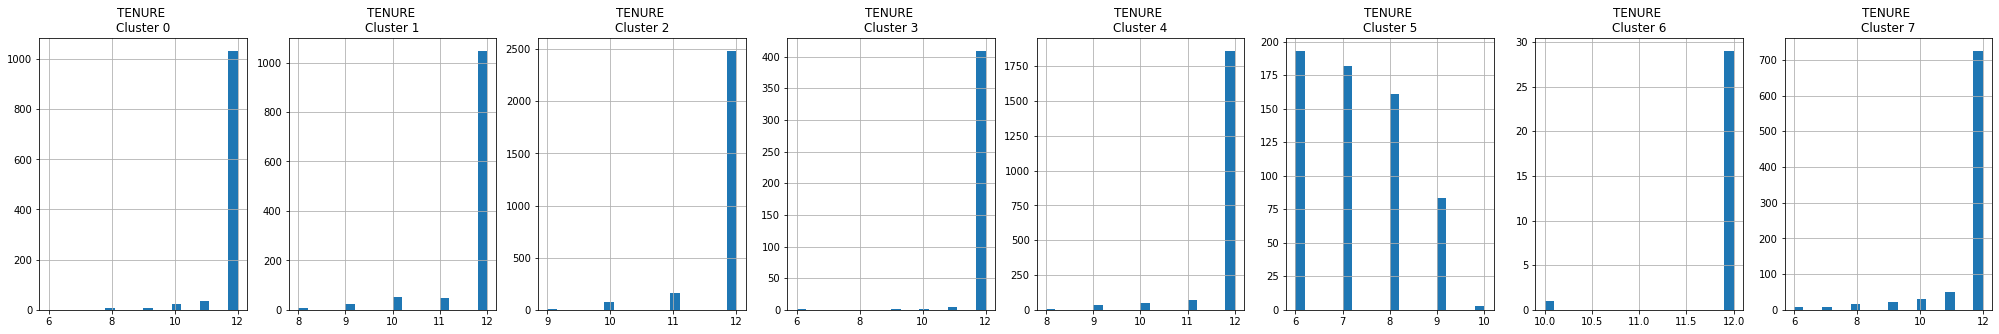

In [52]:
#Histogramas para análise das colunas grupo a grupo
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1) #Parâmetros para plotar 8 gráfico a cada linha
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20) #bins = numero de divisões (revisão)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [53]:
#Salvar base de dados para envio à possível departamento de marketing para campanhas
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4858,1202.204204,1.0,435.04,435.04,0.00,0.000000,0.916667,0.916667,0.00,0.000000,0,11,1200.0,686.958695,847.988773,0.000000,12,0
950,337.629461,1.0,251.44,251.44,0.00,0.000000,1.000000,1.000000,0.00,0.000000,0,12,6000.0,0.000000,864.206542,0.000000,12,0
6127,460.566250,1.0,864.61,864.61,0.00,0.000000,0.833333,0.833333,0.00,0.000000,0,11,3000.0,1880.266926,362.449997,0.250000,12,0
6126,1621.219401,1.0,98.40,98.40,0.00,2745.571593,1.000000,1.000000,0.00,0.583333,16,13,4000.0,3592.092848,567.227496,0.166667,12,0
944,460.432607,1.0,1009.44,858.48,150.96,0.000000,0.916667,0.583333,0.75,0.000000,0,25,4000.0,1292.401995,221.145007,0.000000,12,0


In [54]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1365,5745.789490,1.000,0.00,0.00,0.00,965.726556,0.000000,0.000000,0.000000,0.333333,6,0,13500.0,1684.800793,1779.683281,0.0,12,7
2682,5239.381493,0.625,0.00,0.00,0.00,9798.167329,0.000000,0.000000,0.000000,0.125000,1,0,10000.0,1345.580941,2011.806301,0.0,8,7
5243,3619.986054,1.000,0.00,0.00,0.00,1483.636800,0.000000,0.000000,0.000000,0.750000,17,0,13000.0,942.812569,920.525945,0.0,12,7
1367,4183.877488,1.000,353.75,0.00,353.75,4137.147297,0.833333,0.000000,0.833333,0.250000,6,19,9000.0,8713.847904,1677.290468,0.0,12,7
1195,8884.816576,1.000,1233.58,1233.58,0.00,13674.244020,0.416667,0.416667,0.000000,0.750000,26,7,13000.0,5574.916601,4576.531483,0.0,12,7


In [56]:
#Salvando
credit_ordered.to_csv('clusters.csv')

## Redução da Dimensionalidade com Aplicação de PCA (Principal Component Analysis) e Visualização dos Resultados

In [57]:
pca = PCA(n_components=2) 
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221877, -1.07645353],
       [-1.13828621,  2.50643396],
       [ 0.96968827, -0.38356397],
       ...,
       [-0.92620594, -1.81076677],
       [-2.33655593, -0.65793471],
       [-0.55642504, -0.40046559]])

In [58]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076454
1,-1.138286,2.506434
2,0.969688,-0.383564
3,-0.873626,0.043167
4,-1.599433,-0.688583


In [59]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076454,2
1,-1.138286,2.506434,7
2,0.969688,-0.383564,0
3,-0.873626,0.043167,2
4,-1.599433,-0.688583,2


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

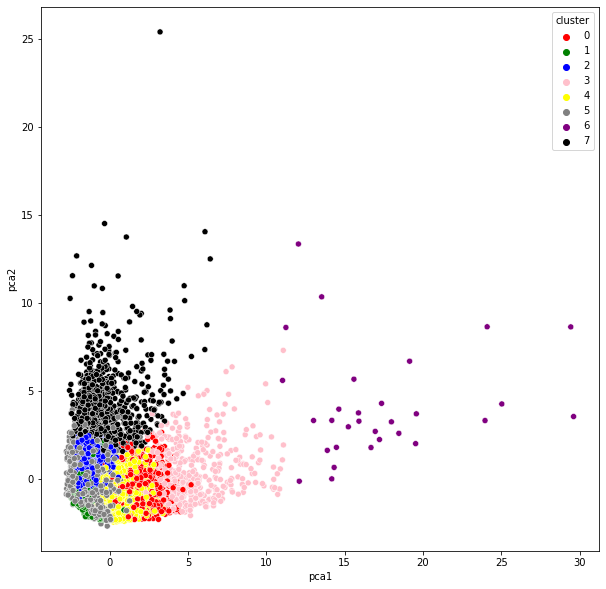

In [60]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Redução da Dimensionalidade com Aplicação de Autoencoders e Visualização dos Resultados

Passo a passo do processo que será feito:

- 17 registros/colunas -> 10 com Autoencoders
- Elbow
- K-means
- PCA

In [61]:
creditcard_df_scaled.shape

(8950, 17)

In [62]:
# 17 neurônios -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [64]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [65]:
# Criando o autoencoder
autoencoder = Model(input_df, decoded)

In [66]:
# Criando o encoder
encoder = Model(input_df, encoded)

In [68]:
#Compliando modelo
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [69]:
#Treinamento do autoenconder
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 13s 38ms/step - loss: 0.1783
Epoch 2/50
280/280 [==============================] - 10s 37ms/step - loss: 0.0711
Epoch 3/50
280/280 [==============================] - 10s 37ms/step - loss: 0.0592
Epoch 4/50
280/280 [==============================] - 11s 38ms/step - loss: 0.0548
Epoch 5/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0781
Epoch 6/50
280/280 [==============================] - 11s 41ms/step - loss: 0.0422
Epoch 7/50
280/280 [==============================] - 13s 47ms/step - loss: 0.0418
Epoch 8/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0708
Epoch 9/50
280/280 [==============================] - 11s 41ms/step - loss: 0.0452
Epoch 10/50
280/280 [==============================] - 12s 43ms/step - loss: 0.0302
Epoch 11/50
280/280 [==============================] - 12s 42ms/step - loss: 0.0244
Epoch 12/50
280/280 [==============================] - 17s 63ms/step - loss: 0.0323
E

In [70]:
creditcard_df_scaled.shape

(8950, 17)

In [71]:
#Compactando DF
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 6ms/step


In [72]:
compact.shape

(8950, 10)

In [73]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [74]:
compact[0]

array([0.31562   , 0.63384587, 0.        , 0.871667  , 1.3349127 ,
       0.08369118, 0.        , 0.17392668, 0.07945755, 0.9636951 ],
      dtype=float32)

Agora deve ser feito o agrupamento utilizando o DF compactado em 10 atributos/colunas. Vou seguir a mesma sequência utilizada antes: <b>Elbow Method -> PCA </b>

In [75]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

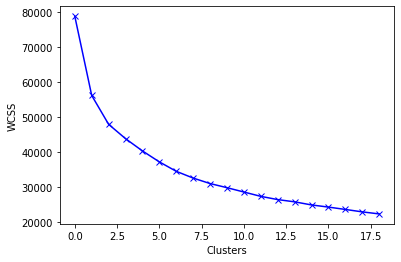

In [76]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

C:\Users\julio\AppData\Local\Temp\ipykernel_12032\8148250.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
C:\Users\julio\AppData\Local\Temp\ipykernel_12032\8148250.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


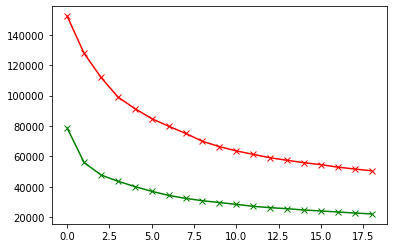

In [77]:
#Comparativo dos dois plots feitos para o Elbow Method
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

Pode-se ver que com os dados compactados com Autoencoders os dados são bem mais objetivos. Aplicando o Elbow Method podemos observar que com cerca de 3 ou 4 clusters teremos a quantidade ideal para análise, diferentemente de antes da aplicação, que tivemos 8 cluster como a quantidade indicada.

In [78]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [79]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 3, 1, ..., 3, 2, 2]), (8950,))

In [80]:
#Voltando à base inicial, concatenando a classificação feita no DF compactado 
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Agora faremos a aplicação do PCA para melhor visualização, igual feito anteriormente

In [81]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.288550,-0.385202
1,1.195998,-1.087166
2,-1.359721,0.344616
3,0.038183,-0.545006
4,-1.624756,-0.215742


In [82]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.288550,-0.385202,1
1,1.195998,-1.087166,3
2,-1.359721,0.344616,1
3,0.038183,-0.545006,3
4,-1.624756,-0.215742,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

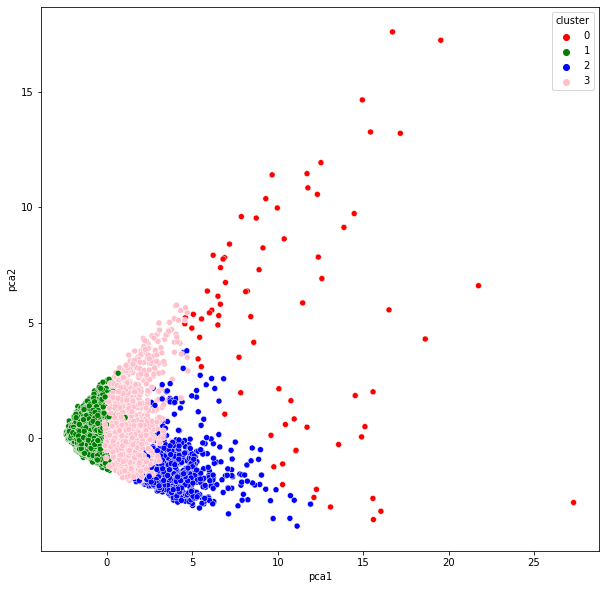

In [83]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [86]:
df_cluster_ordenado = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordenado.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
587,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.007520,537.372671,1.000000,12,0
1709,1917.441126,0.909091,12617.19,76.19,12541.00,0.000000,0.333333,0.166667,0.166667,0.000000,0,5,15000.0,13733.557830,336.823302,0.428571,12,0
3181,11631.323370,1.000000,14686.10,0.00,14686.10,3422.724703,1.000000,0.000000,1.000000,0.083333,2,347,13600.0,11400.601300,10285.134120,0.000000,12,0
3698,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.823540,569.401398,0.727273,12,0
5830,8038.893195,1.000000,0.00,0.00,0.00,197.915586,0.000000,0.000000,0.000000,0.166667,8,0,9000.0,3569.182969,43132.728230,0.000000,12,0


In [87]:
df_cluster_ordenado.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
940,95.645669,0.272727,566.43,463.80,102.63,0.000000,0.166667,0.166667,0.083333,0.000000,0,3,9000.0,73.895095,199.884984,0.000000,12,3
2380,3.290420,0.181818,225.60,0.00,225.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,268.500244,29.584288,0.090909,12,3
938,391.179957,0.909091,7363.38,6965.06,398.32,0.000000,0.833333,0.666667,0.416667,0.000000,0,42,4500.0,11891.449070,889.957080,1.000000,12,3
7306,284.433780,0.363636,212.92,0.00,212.92,0.000000,0.833333,0.000000,0.833333,0.000000,0,15,1500.0,1202.791804,150.107024,0.000000,12,3
6258,1930.900813,0.909091,5616.07,4960.73,655.34,4287.486377,0.666667,0.333333,0.250000,0.333333,15,46,5500.0,10894.444000,864.068895,0.111111,12,3


In [89]:
df_cluster_ordenado.to_csv('clusters2.csv')